## The Importance of Train-Test Split
```In this exercise you will experience with an importent and often neglected issue in the data scienstist work - the train-test split. For a specific dataset we will examine different ways to split it and will understand the limitations and constraints we have to take when creating a good train-test split.```

```~ Ittai Haran```

In [0]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

```First, load the dataset. Notice that the dataset is made out of pairs of objects, where each row has the id of each object and the features related to it. How many different objects are there?
We would like to describe the objects and the data using a specific data structure. What structure can best describe the objects and the relations between them (what two objects happen to be in the same sample)?
You are also given a separated dataset, that we will save for later testing.```

In [0]:
df_edges = pd.read_csv('data.csv')
number_of_objects = len(set(df_edges['index_left']).union(set(df_edges['index_right'])))

```Use networkx to create a graph describing the objects and the relations between them. How many connected components (use networkx) the graph has? Draw a histogram of their sizes. Are there any edges that aren't between left objects and right objects? That kind of graph is called a bipartite graph. For any graph computations, networkx is your friend, and it should be very easy.```

number of connected compnents: 213


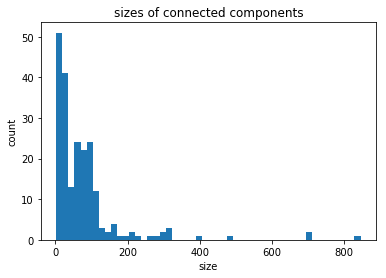

number of objects seen both as left and right objects: 0


In [0]:
graph = nx.Graph(list(zip(df_edges['index_left'], df_edges['index_right'])))
print('number of connected compnents: ' + str(len(list(nx.connected_components(graph)))))
plt.hist(maps(len, list(nx.connected_components(graph))), bins=50)
plt.title('sizes of connected components')
plt.xlabel('size')
plt.ylabel('count')
plt.show()

print('number of objects seen both as left and right objects: ' + 
      str(len(set(df_edges['index_left']).intersection(df_edges['index_right']))))

```In order to get a baseline model we will try to have predictions using only one object from each sample. Create a dataset containig only the left objects. Drop duplicates, so every object will appear only once.```

In [0]:
only_lefts = df_edges.drop_duplicates(subset=['index_left'])\
.drop(['index_right']+list(map(lambda x: 'feature_'+str(x)+'_right', range(1, 101))), axis=1)
features_left = list(map(lambda x: 'feature_'+str(x)+'_left', range(1, 101)))

```Split your data randomly with ratio 0.7-0.3 to train and validation segments. Train a simple model (a random forest, maybe?) to predict the target. Make sure your model isn't overfitted, and try to get the best score you can (on the validation segment). Compare your results to a simple baseline - the mean of the target computed on the train segment.```

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(only_lefts[features_left], only_lefts['target'],
                                                    train_size = 0.7, test_size=0.3)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=10, n_jobs=-1)
model.fit(X_train, Y_train)
print('baseline mse on train: {0}'.format(mean_squared_error(Y_train,np.mean(Y_train)*np.ones(len(Y_train)))))
print('baseline mse on test: {0}'.format(mean_squared_error(Y_test,np.mean(Y_train)*np.ones(len(Y_test)))))
print('mse on train: {0}'.format(mean_squared_error(Y_train, model.predict(X_train))))
print('mse on test: {0}'.format(mean_squared_error(Y_test, model.predict(X_test))))

baseline mse on train: 10.8689803385
baseline mse on test: 10.5786916589
mse on train: 2.59628317179
mse on test: 3.39100736359


```Use the model you got to compute loss on the test dataset given to you. Did you get similar results for the validation and test segments?```

In [0]:
df_edges_test = pd.read_csv('data_test.csv')
only_lefts_test = df_edges_test.drop_duplicates(subset=['index_left'])\
.drop(['index_right']+list(map(lambda x: 'feature_'+str(x)+'_right', range(1, 101))), axis=1)
X_outer_test, Y_outer_test = only_lefts_test[features_left], only_lefts_test['target']
print('mse on true test: {0}'.format(mean_squared_error(Y_outer_test, model.predict(X_outer_test))))

mse on true test: 3.48508008707


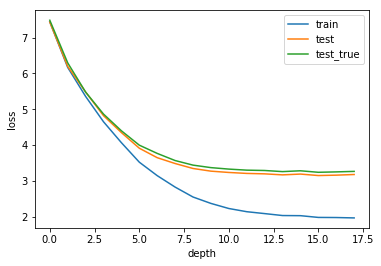

In [0]:
loss_train = []
loss_test = []
loss_test_true = []
for i in range(2,20):
    print(i)
    model = RandomForestRegressor(n_estimators=100, max_depth=i, min_samples_leaf=10, n_jobs=-1)
    model.fit(X_train, Y_train)
    loss_train.append(mean_squared_error(Y_train, model.predict(X_train)))
    loss_test.append(mean_squared_error(Y_test, model.predict(X_test)))
    loss_test_true.append(mean_squared_error(Y_outer_test, model.predict(X_outer_test)))
    
plt.plot(loss_train)
plt.plot(loss_test)
plt.plot(loss_test_true)
plt.xlabel('depth')
plt.ylabel('loss')
plt.legend(['train', 'test', 'test_true'])
plt.show()

```Repeat that process, only this time use all of the sample, and not just the left object. Accordingly, you don't have to drop any duplicates. Use the naive train-test split. Did you get a good score on both train and validation? why (or why not)? Do you think the score you got on the test corresponds to the "real" generalizing error? Compute the loss on the separated test segment to get the "real" error. Is there any gap between validation-error and test-error? Why?```

In [0]:
features_right = list(map(lambda x: 'feature_'+str(x)+'_right', range(1, 101)))
features_all = features_left + features_right

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_edges[features_all], df_edges['target'],
                                                    train_size = 0.7, test_size=0.3)

model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=10, n_jobs=-1)
model.fit(X_train, Y_train)
print('baseline mse on train: {0}'.format(mean_squared_error(Y_train,np.mean(Y_train)*np.ones(len(Y_train)))))
print('baseline mse on test: {0}'.format(mean_squared_error(Y_test,np.mean(Y_train)*np.ones(len(Y_test)))))
print('mse on train: {0}'.format(mean_squared_error(Y_train, model.predict(X_train))))
print('mse on test: {0}'.format(mean_squared_error(Y_test, model.predict(X_test))))

baseline mse on train: 9.11640643598
baseline mse on test: 9.07228970002
mse on train: 1.67874140985
mse on test: 1.74094365372


In [0]:
X_outer_test, Y_outer_test = df_edges_test[features_all], df_edges_test['target']
print('mse on true test: {0}'.format(mean_squared_error(Y_outer_test, model.predict(X_outer_test))))

mse on true test: 3.15939364579


## Here I should supply them with "real" test data, and show them that they fail

```We will now create a new train-test split, so that every connected component is contained either in the train segment or in the test segment. To do so, implement the following algorithm:```

```while length(train_segment)<0.7*length(data):
    choose randomly a sample s from the data (that is not in train_segment)
    add the connected component containing s to the train_segment
test_segment = data - train_segment```

In [0]:
edges_to_indexes = dict(zip(list(zip(df_edges['index_left'], df_edges['index_right'])), df_edges.index))
nx.set_edge_attributes(graph, values=edges_to_indexes, name='edge_index')

In [0]:
all_connected_subgraphs = list(enumerate(nx.connected_component_subgraphs(graph)))

In [0]:
train_index = []
components_seen = []
indexes_to_choose_from = list(df_edges.index)
while len(train_index)<=0.7*len(df_edges):
    place = np.random.choice(indexes_to_choose_from)
    sample = df_edges.iloc[place]
    num, connected_component = list(filter(lambda x: sample['index_left'] in list(x[1].nodes()), all_connected_subgraphs))[0]
    components_seen.append(connected_component)
    
    
    train_index.extend(list(map(lambda x: connected_component[x[0]][x[1]]['edge_index'], connected_component.edges())))
    all_connected_subgraphs = list(filter(lambda x: x[0]!=num, all_connected_subgraphs))
    
    train_index = list(set(train_index))
    
    indexes_to_choose_from = list(set(indexes_to_choose_from)-set(train_index))
    
    print(len(train_index))
    

865
33489
33523
34191
38965
51131
83111
97325
102896
104733
109252
110292
112909
114511
114914
115762
116324
116840


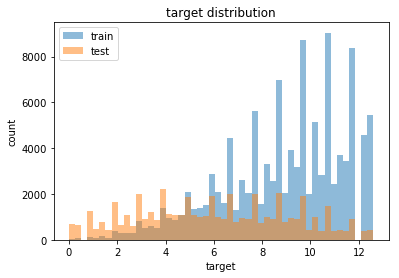

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = (df_edges[features_all].iloc[train_index],
                                    df_edges[features_all].iloc[indexes_to_choose_from],
                                    df_edges['target'].iloc[train_index],
                                    df_edges['target'].iloc[indexes_to_choose_from])

plt.hist(Y_train.values.reshape(-1).astype(float), bins=50, alpha=0.5)
plt.hist(Y_test.values.reshape(-1).astype(float), bins=50, alpha=0.5)
plt.title('target distribution')
plt.xlabel('target')
plt.ylabel('count')
plt.legend(['train', 'test'])
plt.show()

```Train a good model using your train segment. What is the best score you can get on your validation segment? Compare it to the test segment. What is the problem with the train-test split method we used? Hint: How many connected components are there in the train segment, and how many are in the validation segment? Examine also the distribution of the target, both in the train and in the test. Do they look the same? Can we safely use the validation to estimate the generalization error on the test segment?```

In [0]:
loss_train = []
loss_test = []
loss_test_true = []
for depth in range(2,18):
    model = RandomForestRegressor(n_estimators=100, max_depth=depth, min_samples_leaf=10, n_jobs=-1)
    model.fit(X_train, Y_train)
    loss_train.append(mean_squared_error(Y_train, model.predict(X_train)))
    loss_test.append(mean_squared_error(Y_test, model.predict(X_test)))
    loss_test_true.append(mean_squared_error(Y_outer_test, model.predict(X_outer_test)))
    print(loss_train[-1], loss_test[-1], loss_test_true[-1])

(4.8311505073683065, 12.70852285020663, 6.880370804807059)
(4.18908700441413, 10.87597723238962, 6.110663405628591)
(3.615479790579056, 9.54010147253099, 5.4174923037564175)
(2.906382469732332, 7.96204414153851, 4.618847829989965)
(2.352473681824064, 7.0497729336720365, 4.182123814906766)
(1.8646728420105156, 6.287416040791319, 3.77398856351081)
(1.5048619892053847, 5.7933941907554045, 3.5440897038406214)
(1.2012459392562271, 5.335673925499645, 3.3061442288877103)
(0.9673517074420637, 4.967485877032553, 3.1075463436489827)
(0.8052904216102758, 4.666439451719284, 2.9467607641488573)
(0.6678313879731312, 4.479697815270882, 2.8416945127427344)
(0.560439877493171, 4.37587321982637, 2.7763399337692536)
(0.47630031114084814, 4.2821088955650835, 2.7281257525217426)
(0.4003623438384168, 4.1646434135437955, 2.637539663586399)
(0.3502310473100419, 4.083195182578721, 2.6065558377414013)
(0.3077733729658098, 4.030263276375575, 2.5581472157687104)


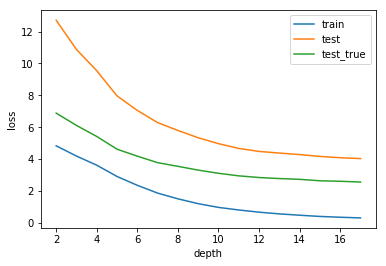

In [0]:
plt.plot(range(2,18), loss_train)
plt.plot(range(2,18), loss_test)
plt.plot(range(2,18), loss_test_true)
plt.xlabel('depth')
plt.ylabel('loss')
plt.legend(['train', 'test', 'test_true'])
plt.show()

```Do the train-test split again, only this time make sure you have ~0.7 of the connected components in your train segment. That is, implement the following algorithm:```

```while length(train_segment)<0.7*length(data):
    choose randomly a connected component c from the graph
    add c to the train_segment
test_segment = data-train_segment```

In [0]:
from sklearn.utils import shuffle
all_connected_subgraphs = shuffle(list(enumerate(nx.connected_component_subgraphs(graph))))
all_connected_subgraphs_lengths = np.cumsum(list(map(lambda x: len(x[1].edges()), all_connected_subgraphs)))
all_connected_subgraphs_lengths = np.array(all_connected_subgraphs_lengths)/float(all_connected_subgraphs_lengths[-1])
place_cut_off = np.argmax(all_connected_subgraphs_lengths>0.7)+1
print(place_cut_off)

181


In [0]:
train_index = [item for sublist in
 maps(lambda x: maps(lambda y: x[1][y[0]][y[1]]['edge_index'], x[1].edges()), all_connected_subgraphs[:place_cut_off])
 for item in sublist]
indexes_to_choose_from = list(set(list(df_edges.index)) - set(train_index))

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = (df_edges[features_all].iloc[train_index],
                                    df_edges[features_all].iloc[indexes_to_choose_from],
                                    df_edges['target'].iloc[train_index],
                                    df_edges['target'].iloc[indexes_to_choose_from])

```What part of the connected components you have in your train segment this time? Try alse look again at the distribution of the target in the two segments.```

part of connected components: 0


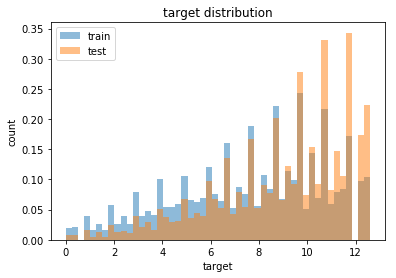

In [0]:
print('part of connected components: ' + str((place_cut_off)/len(all_connected_subgraphs_lengths)))
plt.hist(Y_train.values.reshape(-1).astype(float), bins=50, alpha=0.5, normed=1)
plt.hist(Y_test.values.reshape(-1).astype(float), bins=50, alpha=0.5, normed=1)
plt.title('target distribution')
plt.xlabel('target')
plt.ylabel('count')
plt.legend(['train', 'test'])
plt.show()

```Train a good model using you train segment. What is the best score you can get on your validation and test segments? Did you get a better score? Can you now use the validation segment to estimate the generalization error? ```

In [0]:
loss_train = []
loss_test = []
loss_test_true = []
for depth in range(2,18):
    model = RandomForestRegressor(n_estimators=100, max_depth=depth, min_samples_leaf=10, n_jobs=-1)
    model.fit(X_train, Y_train)
    loss_train.append(mean_squared_error(Y_train, model.predict(X_train)))
    loss_test.append(mean_squared_error(Y_test, model.predict(X_test)))
    loss_test_true.append(mean_squared_error(Y_outer_test, model.predict(X_outer_test)))
    print(loss_train[-1], loss_test[-1], loss_test_true[-1])
    
# print('baseline mse on train: {0}'.format(mean_squared_error(Y_train,np.mean(Y_train)*np.ones(len(Y_train)))))
# print('baseline mse on test: {0}'.format(mean_squared_error(Y_test,np.mean(Y_train)*np.ones(len(Y_test)))))
# print('mse on train: {0}'.format(mean_squared_error(Y_train, model.predict(X_train))))
# print('mse on test: {0}'.format(mean_squared_error(Y_test, model.predict(X_test))))

(6.79218084755725, 7.0018495541876336, 6.541858476434952)
(6.04063607677378, 6.470903474318917, 5.983578575066029)
(4.929062521015486, 5.650311633464411, 5.235189791917906)
(4.10935129480204, 5.215988239962101, 4.756176258084259)
(3.5186651340898614, 4.8323712644233145, 4.3802154373125015)
(2.9181033805284984, 4.487513710126962, 4.1469820380359526)
(2.3727348955497365, 4.0215831014238965, 3.789035598435183)
(1.984955057285889, 3.8057440363503314, 3.568725368052451)
(1.660527209983657, 3.5973687382764115, 3.3094759956146302)
(1.4469709511548032, 3.4616217202176593, 3.234768158789259)
(1.2099982441682597, 3.2930151047781053, 3.063662892170651)
(1.0278680123277542, 3.2062865080797285, 2.943022723005414)
(0.8915388542772331, 3.071349977863716, 2.8790867840082326)
(0.7512485535379863, 2.9527632734939884, 2.7225368860744505)
(0.6739378554308755, 2.949813387594654, 2.7782346541159364)
(0.5823066431223957, 2.8721374548409875, 2.684320759616731)


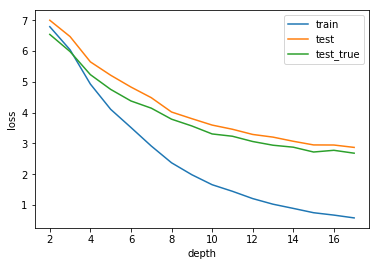

In [0]:
plt.plot(range(2,18), loss_train)
plt.plot(range(2,18), loss_test)
plt.plot(range(2,18), loss_test_true)
plt.xlabel('depth')
plt.ylabel('loss')
plt.legend(['train', 'test', 'test_true'])
plt.show()

```Bonus: the data for this exercise was uniquely generated, using MNIST (what? how???). Can you generate a similar dataset? What parameters control this problem? Exaplaine how it can be done.```

## generate data

In [0]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def maps(func, lister):
    return list(map(func, lister))

In [0]:
count_1 = 12000
count_2 = 6000
connected_count = 200

vertices_1 = list(map(lambda x: str(x)+'_1', list(range(count_1))))
vertices_2 = list(map(lambda x: str(x)+'_2', list(range(count_2))))
all_vertices = vertices_1 + vertices_2

In [0]:
probas_1 = np.linspace(0,1,len(vertices_1))**1.1
probas_1 = probas_1/float(sum(probas_1))

probas_2 = np.linspace(0,1,len(vertices_2))**1.1
probas_2 = probas_2/float(sum(probas_2))

indexes_cut_off_1 = sorted(np.random.choice(list(range(len(vertices_1))), size = connected_count, replace=False, p=probas_1))
indexes_cut_off_2 = sorted(np.random.choice(list(range(len(vertices_2))), size = connected_count, replace=False, p=probas_2))

In [0]:
vertices_1_groups = []
for i,j in zip([0]+indexes_cut_off_1, indexes_cut_off_1):
    vertices_1_groups.append(vertices_1[i:j])
    
vertices_2_groups = []
for i,j in zip([0]+indexes_cut_off_2, indexes_cut_off_2):
    vertices_2_groups.append(vertices_2[i:j])
    
p = 0.3
edges = []
for vert_1, vert_2 in zip(vertices_1_groups, vertices_2_groups):
    edges_count = int(len(vert_1)*len(vert_2)*p)
    edges.extend(list(zip(np.random.choice(vert_1, edges_count), np.random.choice(vert_2, edges_count))))

In [0]:
graph = nx.Graph(edges)
all_vertices = [item for sublist in map(list, sorted(list(nx.connected_components(graph)), key=lambda x: -len(x))) for item in sublist]

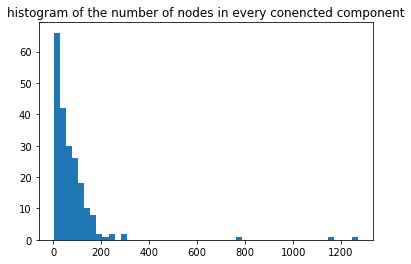

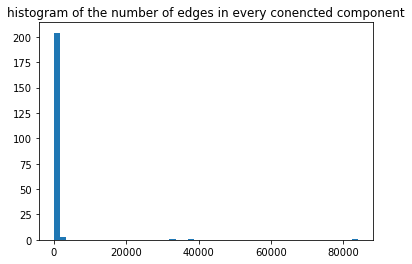

In [0]:
plt.hist(list(map(len, list(nx.connected_components(graph)))), bins=50)
plt.title('histogram of the number of nodes in every conencted component')
plt.show()

plt.hist(list(map(lambda x: len(x.edges()), list(nx.connected_component_subgraphs(graph)))), bins=50)
plt.title('histogram of the number of edges in every conencted component')
plt.show()

In [0]:
from keras.datasets import mnist
import skimage.measure
df = mnist.load_data()

(x_train, y_train), (x_test, y_test) = df
x_train = skimage.measure.block_reduce(x_train, (1,3,3), np.max)

all_images = x_train.reshape(x_train.shape[0], 10**2)
all_images = all_images[20000:20000+len(all_vertices)]
y_train = y_train[20000:20000+len(all_vertices)]

In [0]:
ps = 5*((y_train)/float(max(y_train)))+1
ps = np.random.random(len(ps))**ps

all_images_and_y_train = sorted(list(zip(all_images, y_train, ps)), key=lambda x: x[2])
all_images = np.array(list(map(lambda x: x[0], all_images_and_y_train)))
y_train = np.array(list(map(lambda x: x[1], all_images_and_y_train)))

In [0]:
features_vertices = pd.DataFrame(all_images, columns = list(map(lambda x: 'feature_'+str(x), range(1, all_images.shape[1]+1))))
features_vertices['index'] = all_vertices
features_vertices['result_single'] = features_vertices['index'].apply(lambda x: 1 if x.endswith('1') else 0.4)*y_train

In [0]:
features_vertices = features_vertices.set_index('index')
df_edges_left = features_vertices.loc[list(map(lambda x: x[0], edges))].reset_index()
df_edges_right = features_vertices.loc[list(map(lambda x: x[1], edges))].reset_index()

df_edges_left.columns = list(map(lambda x: x+'_left', df_edges_left.columns))
df_edges_right.columns = list(map(lambda x: x+'_right', df_edges_right.columns))

In [0]:
df_edges = pd.DataFrame(np.concatenate([df_edges_left.values, df_edges_right.values], axis=1),
                        columns = list(df_edges_left.columns)+list(df_edges_right.columns))
df_edges['target'] = df_edges['result_single_left']+df_edges['result_single_right']
df_edges = df_edges.drop(['result_single_left', 'result_single_right'], axis=1)

cols = list(df_edges.columns)
cols.remove('index_left')
cols.remove('index_right')
df_edges = df_edges[['index_left', 'index_right'] + cols]

from sklearn.utils import shuffle
df_edges = shuffle(df_edges)
df_edges = df_edges.drop_duplicates()
df_edges.index = list(range(len(df_edges)))

In [0]:
df_edges['index_left'] = df_edges['index_left'].apply(lambda x: x+'_test')
df_edges['index_right'] = df_edges['index_right'].apply(lambda x: x+'_test')

In [0]:
df_edges.to_csv('data_test.csv', index=False)